In [61]:
# Define the dataframe with the csv file, then describe the first five records
import pandas as pd 
import numpy as np
df = pd.read_csv('medical_raw_data.csv', na_values = 'NA', index_col = 0) 

# Visually inspect dataframe to spot problems
pd.set_option("display.max_columns", None)
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491e

In [62]:
# Investigate datatypes, number of non-NaN values, and dataframe shape. Considered data profiling.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [63]:
# Check uniqueness constraints on CaseOrder, Customer_id, Interaction, and UID all at once using for loop
unique_cols = df[['CaseOrder', 'Customer_id', 'Interaction', 'UID']]
for col in unique_cols:
    print(col)
    print(unique_cols[col].value_counts().count())

CaseOrder
10000
Customer_id
10000
Interaction
10000
UID
10000


In [64]:
# Returning number of rows, columns
df.shape

(10000, 52)

In [65]:
# Returning a total count of duplicated values, no duplicates found. Solves the first problem.
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [66]:
# Provides summary of all the variables with missing values
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

There are 7 columns with missing values: children, age, income, soft_drink, overweight, anxiety and initial_days

1. Children and Age are considered discrete quantitative variables because they can only be whole numbers
2. Income and Initial_days are considered continuous quantitative variables because your income can be whole numbers or contain decimals
3. Overweight, Soft_drink and Anxiety are considered nominal qualitative variables because they are either yes or no

We will return basic statistics on the quantitative variables to check the before and after imputation.

In [67]:
# Checking statistical info on the columns with missing data that are quantitative + all other quantitative variables
df[['Children', 'Age', 'Income', 'Initial_days']].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


In [68]:
df[['Population', 'Additional_charges', 'TotalCharge', 'VitD_supp', 'Lat', 'Lng','VitD_levels', 'Doc_visits', 'Full_meals_eaten']].describe()

,Population,Additional_charges,TotalCharge,VitD_supp,Lat,Lng,VitD_levels,Doc_visits,Full_meals_eaten
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9965.253800,12934.528586,5891.538261,0.398900,38.751099,-91.243080,19.412675,5.012200,1.001400
std,14824.758614,6542.601544,3377.558136,0.628505,5.403085,15.205998,6.723277,1.045734,1.008117
min,0.000000,3125.702716,1256.751699,0.000000,17.967190,-174.209690,9.519012,1.000000,0.000000
25%,694.750000,7986.487642,3253.239465,0.000000,35.255120,-97.352982,16.513171,4.000000,0.000000
50%,2769.000000,11573.979365,5852.250564,0.000000,39.419355,-88.397230,18.080560,5.000000,1.000000
75%,13945.000000,15626.491033,7614.989701,1.000000,42.044175,-80.438050,19.789740,6.000000,2.000000
max,122814.000000,30566.073130,21524.224210,5.000000,70.560990,-65.290170,53.019124,9.000000,7.000000


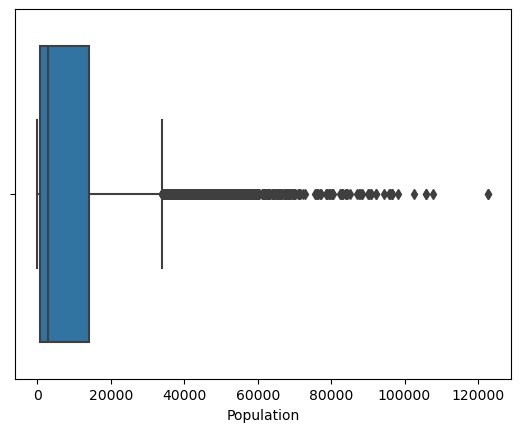

In [69]:
# Plotting histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Use boxplot to check for outliers. This is applied for all quantitative variables. 
boxplot = sns.boxplot(x = 'Population', data = df)

Once the Seaborn package is imported, we can create histograms of the quantitative variables Children, Age, Income, Initial_days, to visually analyze their distribution.

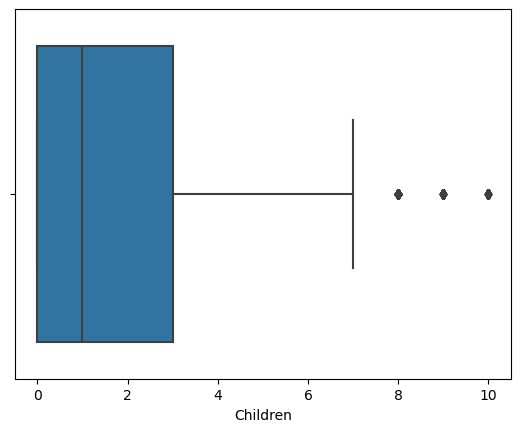

In [70]:
# Use boxplot to check for outliers. This was done before imputation for all quantitative variables
# It was done after imputation for the quantitative values with missing data. 
boxplot = sns.boxplot(x = 'Children', data = df)

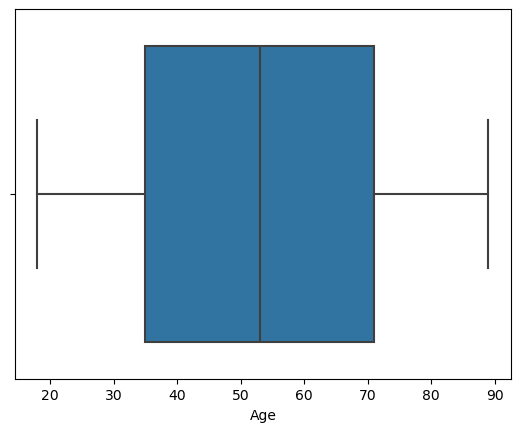

In [71]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Age', data = df)

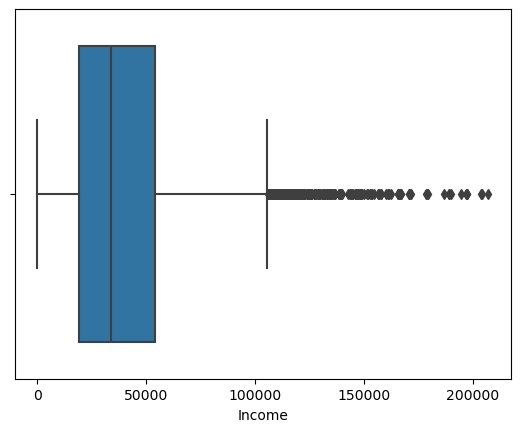

In [72]:
# Max seems reasonable, but min seems low. Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Income', data = df)

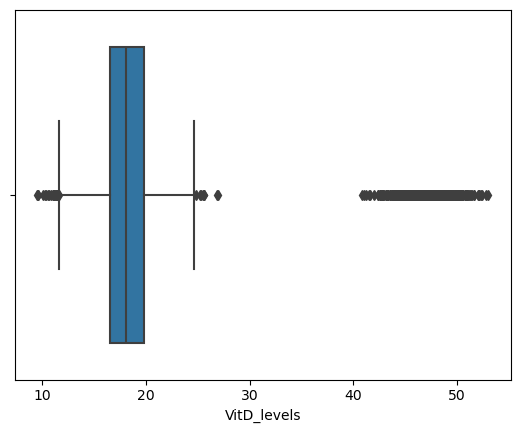

In [73]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'VitD_levels', data = df)

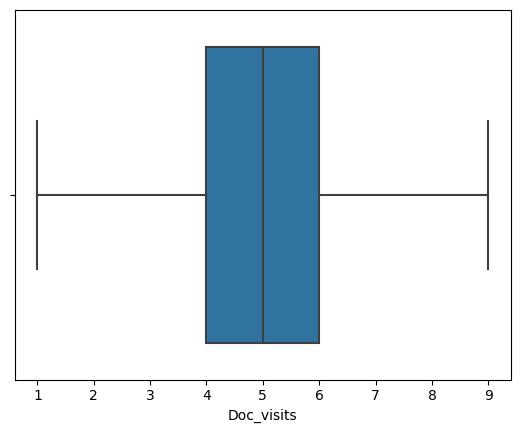

In [74]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Doc_visits', data = df)

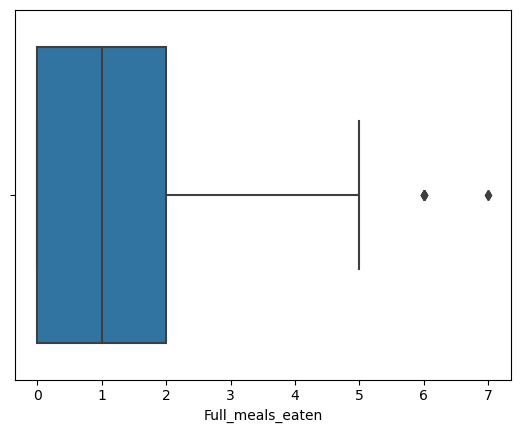

In [75]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Full_meals_eaten', data = df)

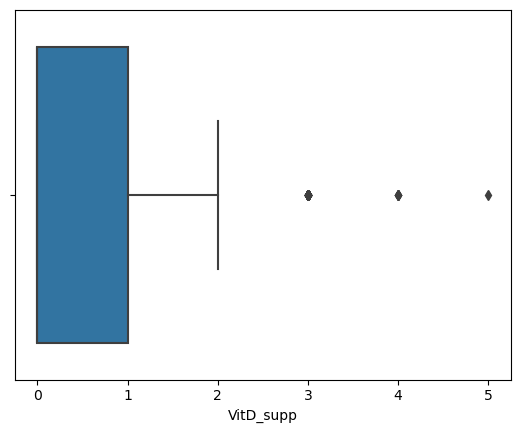

In [76]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'VitD_supp', data = df)

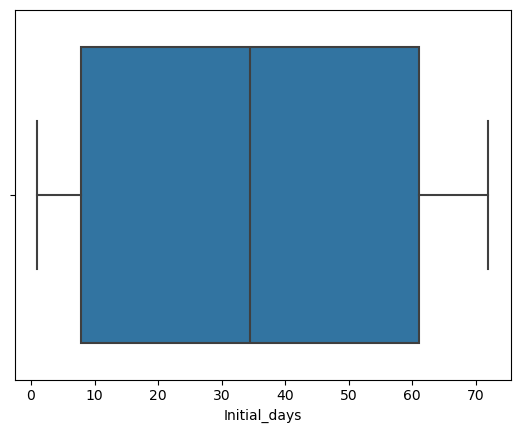

In [77]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Initial_days', data = df)

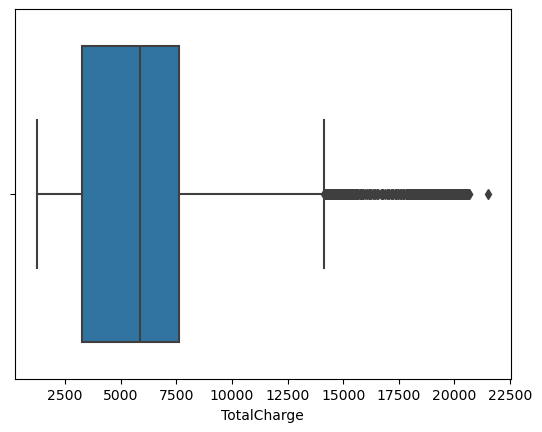

In [78]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'TotalCharge', data = df)

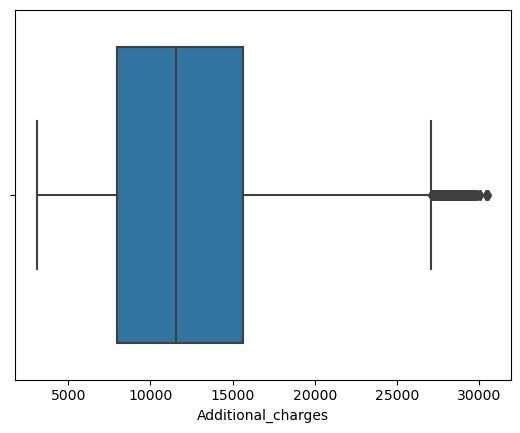

In [79]:
# Use boxplot to check for outliers.
boxplot = sns.boxplot(x = 'Additional_charges', data = df)

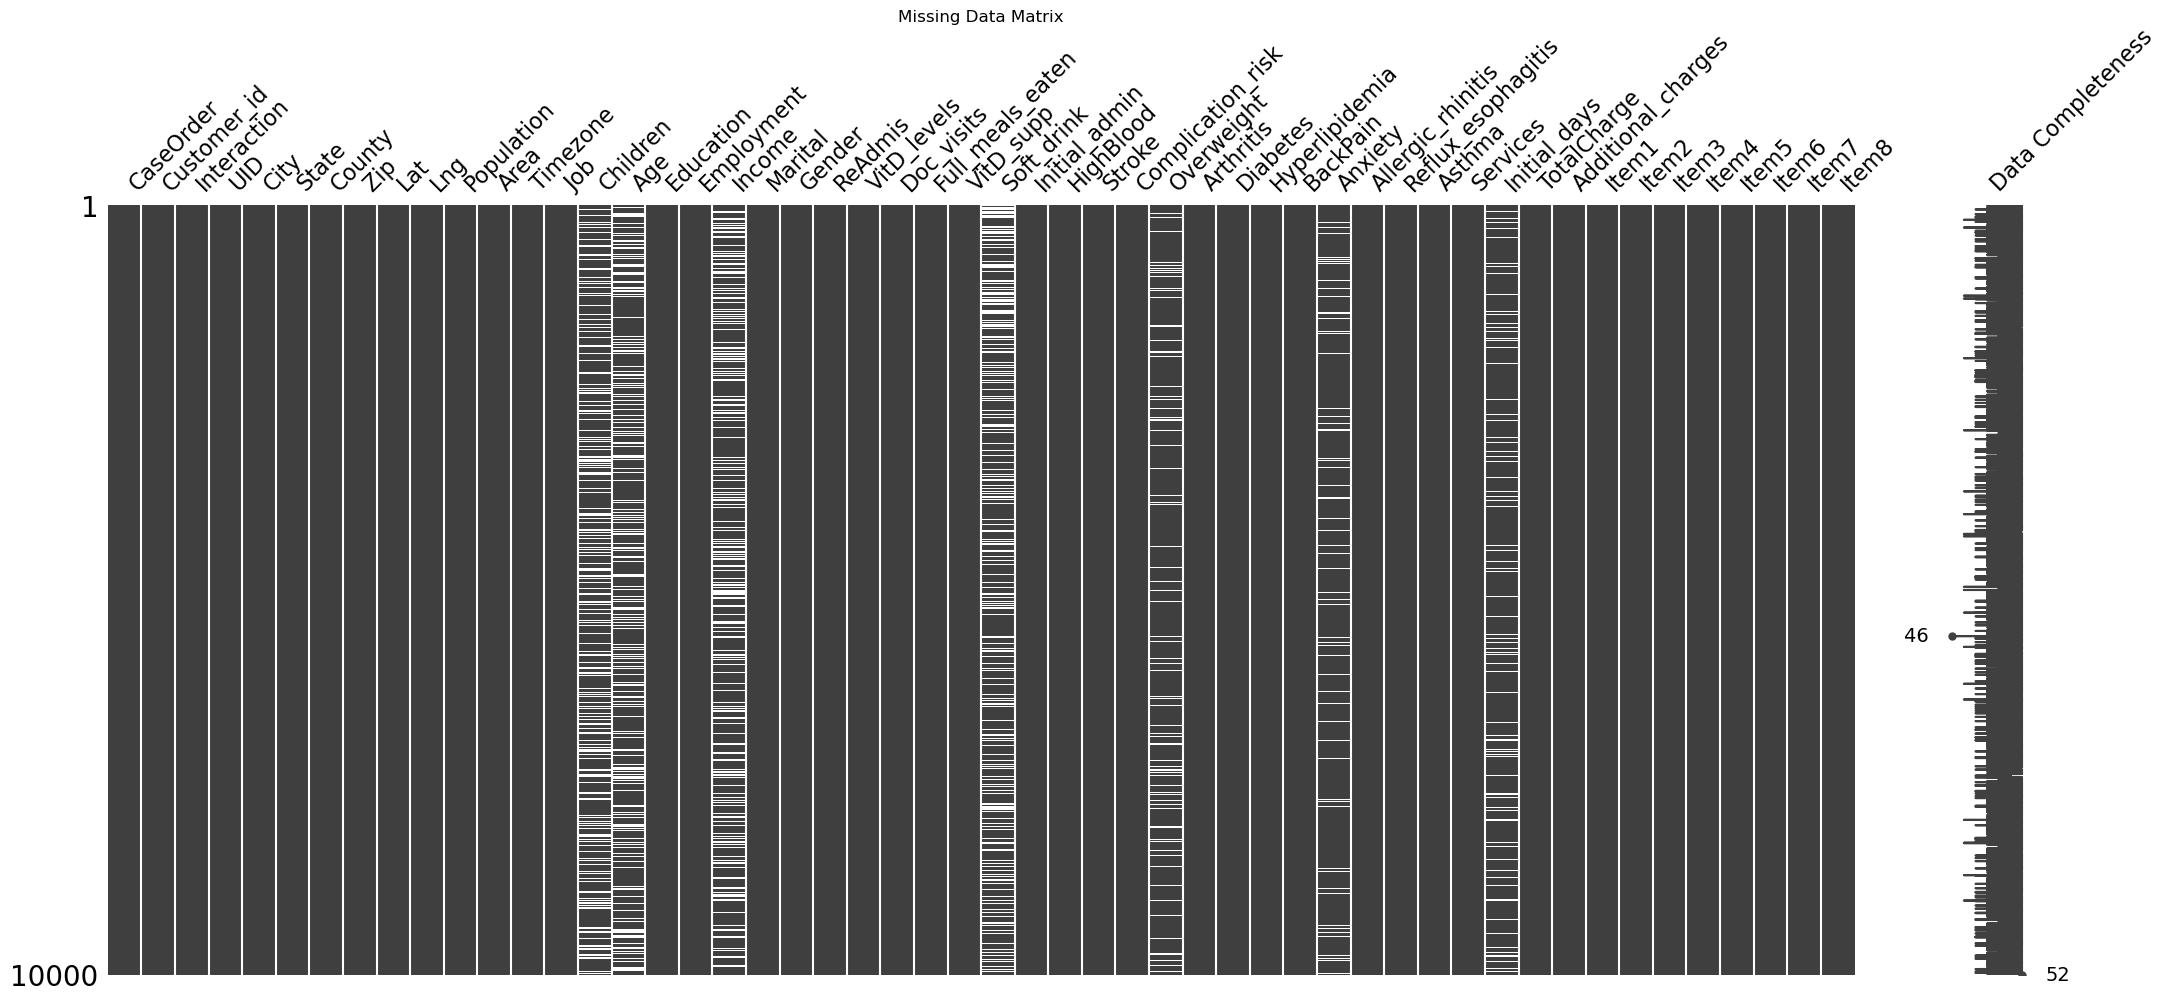

In [80]:
import missingno as msno

# Visually inspect missing data as it is ordered originally
msno.matrix(df, labels = True)
plt.title('Missing Data Matrix')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

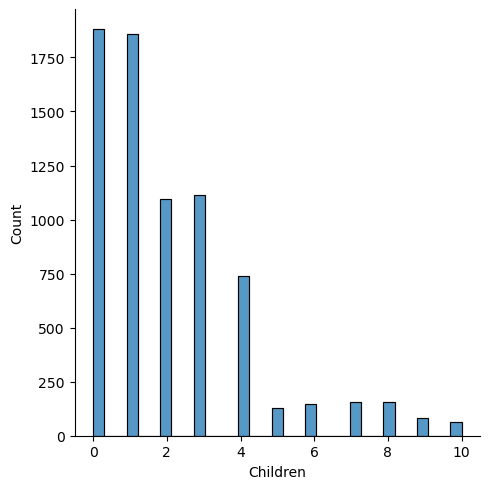

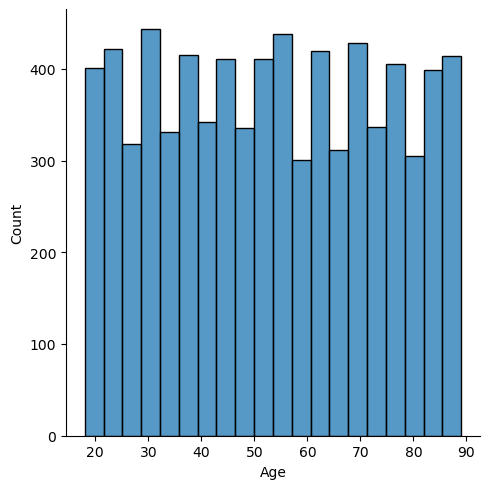

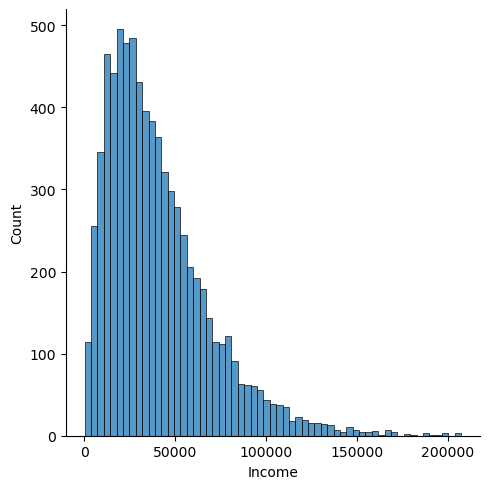

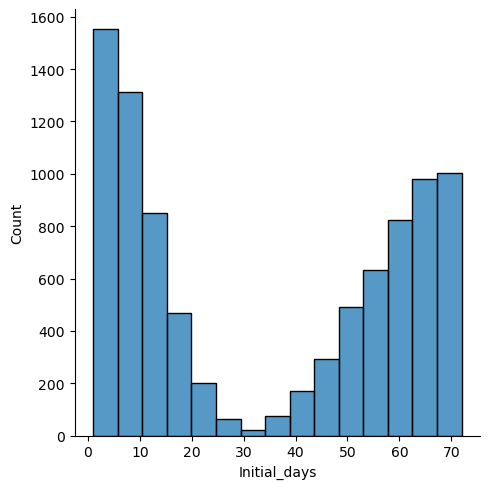

In [81]:
# Plot the quantitative variables with missing data only
sns.displot(df, x='Children')
sns.displot(df, x='Age')
sns.displot(df, x='Income')
sns.displot(df, x='Initial_days')

From these graphs, we can see that:

1. Both Children and Income are positively skewed to the right
2. Age is uniformly distributed
3. Initial_days has a bimodal distribution

For Income, Children and Initial_days variables, we will treat missing values by imputation using the median value while for Age we will be using the mean for imputation.

In [82]:
# Performing imputation. Median used for skewed and bimodal distributions, mean for normal distribution. 
df['Children'].fillna(df['Children'].median(), inplace= True) # Using median value for Children
df['Income'].fillna(df['Income'].median(), inplace= True) # Using median value for Income
df['Initial_days'].fillna(df['Initial_days'].median(), inplace= True) # Using median value for Initial_days
df['Age'].fillna(df['Age'].mean(), inplace= True) # Using mean value for Age

In [83]:
# Checking statistics for comparison
df[['Children', 'Age', 'Income','Initial_days']].describe()

,Children,Age,Income,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.814000,53.295676,38872.450471,34.433651
std,1.916969,17.993375,25042.796229,24.860232
min,0.000000,18.000000,154.080000,1.001981
25%,1.000000,41.000000,23956.162500,8.928987
50%,1.000000,53.295676,33942.280000,34.446941
75%,3.000000,65.000000,46466.797500,59.459981
max,10.000000,89.000000,207249.130000,71.981486


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

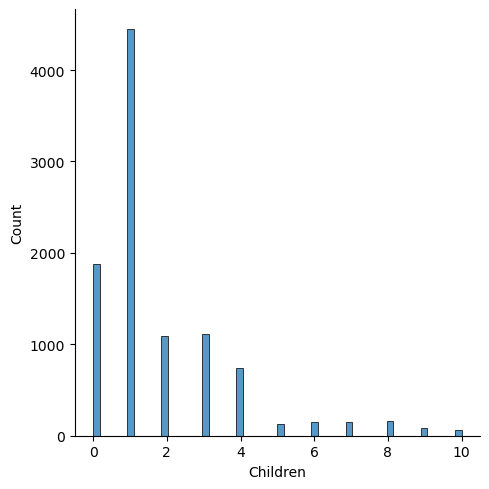

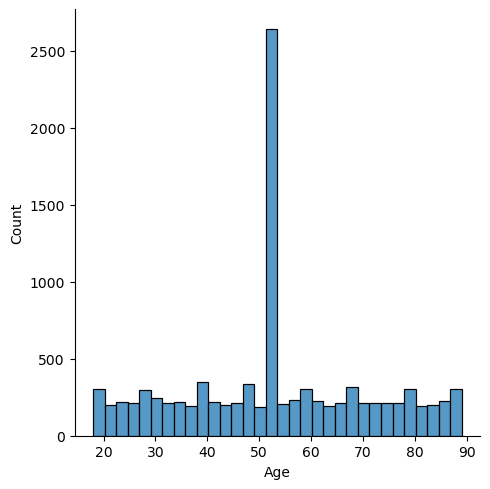

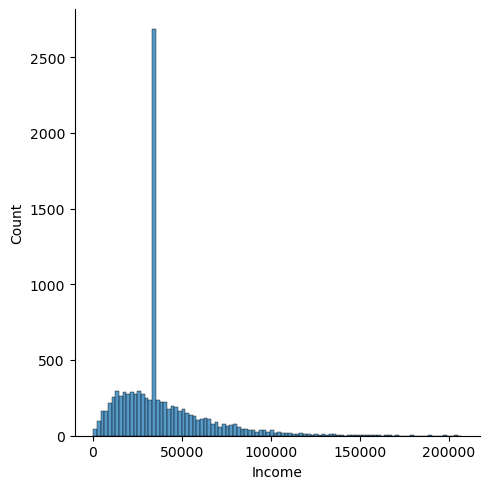

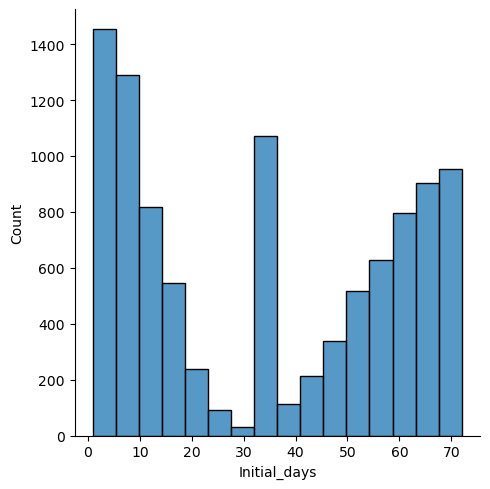

In [84]:
# Plotting histograms again to check for skewness
sns.displot(df, x='Children')
sns.displot(df, x='Age')
sns.displot(df, x='Income')
sns.displot(df, x='Initial_days')

In [85]:
# Detecting missing values in each categorical, qualitative variable
print(df['Overweight'].isnull().value_counts())
print('') 
print(df['Soft_drink'].isnull().value_counts())
print('')
print(df['Anxiety'].isnull().value_counts())

Overweight
False    9018
True      982
Name: count, dtype: int64

Soft_drink
False    7533
True     2467
Name: count, dtype: int64

Anxiety
False    9016
True      984
Name: count, dtype: int64


In [86]:
# Determining value counts for each category in the Overweight column
df['Overweight'].value_counts(normalize=True, sort=True)

Overweight
1.0    0.709137
0.0    0.290863
Name: proportion, dtype: float64

In [87]:
# Treating missing values in Overweight column with '1' (highest percentage category/most frequent)
df['Overweight'].fillna(1, inplace=True)

In [88]:
# Determining value counts for each category in the Overweight column
df['Anxiety'].value_counts(normalize=True, sort=True) # We are using the parameter normalize to return the proportions rather than frequencies

Anxiety
0.0    0.677684
1.0    0.322316
Name: proportion, dtype: float64

In [89]:
# Treating missing values in Anxiety column with '0' (highest percentage category/most frequent)
df['Anxiety'].fillna(0, inplace=True)

In [90]:
# We will run the .unique() function to determine number of unique values for specified variables
df['Soft_drink'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [91]:
# Determining value counts for each category in the Soft_drink column
df['Soft_drink'].value_counts(normalize=True, sort=True, dropna=True) # not including the NaN values

Soft_drink
No     0.741935
Yes    0.258065
Name: proportion, dtype: float64

In [92]:
# Treating missing values in Soft_drink column with 'No' (highest percentage category/most frequent)
df['Soft_drink'].fillna('No', inplace=True)

In [93]:
# Rechecking for any missing values
df['Soft_drink'].unique()

array(['No', 'Yes'], dtype=object)

In [94]:
# Replicate the variable in preparation for replacing its categorical values with numeric ones. 
# This replicated variable will store the re-expressed values once converted

df['Soft_drink_numeric'] = df['Soft_drink']

In [95]:
# Checking duplicated column 'Soft_drink_numeric' vs original "Soft_drink"
df[['Soft_drink_numeric', 'Soft_drink']]

,Soft_drink_numeric,Soft_drink
1,No,No
2,No,No
3,No,No
4,No,No
5,Yes,Yes
...,...,...
9996,No,No
9997,No,No
9998,Yes,Yes
9999,No,No


In [96]:
# Set up a dictionary specifically for converting the categorical values to numeric values.
dict_soft_drink = {'Soft_drink_numeric': {'No': 0, 'Yes': 1}}

In [97]:
# Use the dictionary to replace the variable’s values. 
# The replace function will replace the values according to the rules in the dictionary dict_edu and store in existing data frame.
df.replace(dict_soft_drink, inplace=True)

In [98]:
# Checking info on new dataframe, null values should be filled in
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Education

<Axes: xlabel='Children'>

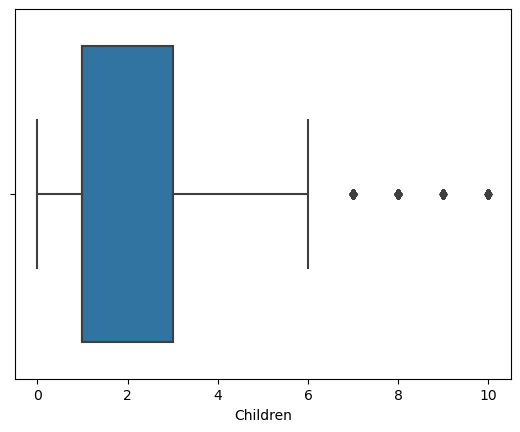

In [99]:
# Children boxplot
sns.boxplot(x='Children', data=df)

<Axes: xlabel='Age'>

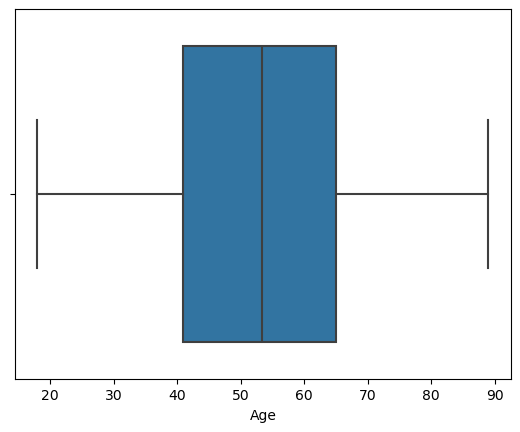

In [100]:
# Age boxplot
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Income'>

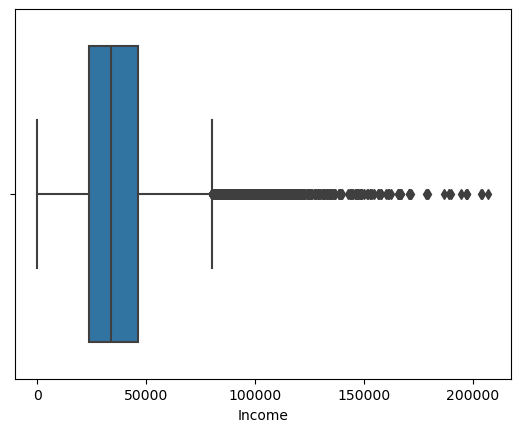

In [101]:
# Income boxplot
sns.boxplot(x='Income', data=df)

<Axes: xlabel='Initial_days'>

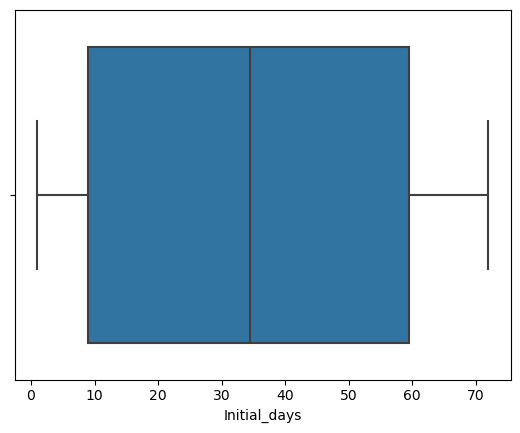

In [102]:
# Initial_days boxplot
sns.boxplot(x='Initial_days', data=df)

In [44]:
df['Income'].describe()

count     10000.000000
mean      38872.450471
std       25042.796229
min         154.080000
25%       23956.162500
50%       33942.280000
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64

In [45]:
# Getting basic statistical info on Income and Children columns
df['Children'].describe()

count    10000.000000
mean         1.814000
std          1.916969
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [103]:
# Quantity of outliers in the Income column
df['Income'][df['Income'] > 46466.7975].count()

2500

In [104]:
# Importing Scipy package
import scipy.stats as stats

# Creating a new column for the Income z-scores and Children z-scores
df['Income_z_Scores'] = stats.zscore(df['Income'])
df['Children_z_Scores'] = stats.zscore(df['Children'])

# Viewing first 10 records for both Income and Children z-score columns
df[['Children', 'Children_z_Scores']].head(10)

,Children,Children_z_Scores
1,1.0,-0.424650
2,3.0,0.618716
3,3.0,0.618716
4,0.0,-0.946333
5,1.0,-0.424650
6,1.0,-0.424650
7,0.0,-0.946333
8,7.0,2.705447
9,1.0,-0.424650
10,2.0,0.097033


In [105]:
df[['Income', 'Income_z_Scores']].head(10)

,Income,Income_z_Scores
1,86575.93,1.904974
2,46805.99,0.316815
3,14370.14,-0.978466
4,39741.49,0.034704
5,1209.56,-1.504016
6,33942.28,-0.196880
7,10456.05,-1.134770
8,33942.28,-0.196880
9,55586.48,0.667452
10,38965.22,0.003705


In [106]:
# Extracting records with z-scores -3 < z and z > 3 and saving as new variable 
income_outliers = df.query('Income_z_Scores < -3 | Income_z_Scores > 3')
children_outliers = df.query('Children_z_Scores < -3 | Children_z_Scores > 3')

In [107]:
# Creating a dataframe with Children and Income outliers removed and saving as df_new
df_new = df[(df['Income_z_Scores'] > -3) & (df['Income_z_Scores'] < 3) & (df['Children_z_Scores'] > -3) & (df['Children_z_Scores'] < 3)]

In [108]:
# Checking z-scores in df_new for any z-scores missed in both Income and Children column
df_new['Income_z_Scores'].loc[lambda x : (x < -3) | (x > 3)].sum()
df_new['Children_z_Scores'].loc[lambda x : (x < -3) | (x > 3)].sum()

0.0

In [109]:
# Extracting dataframe 'df_new' into a CSV file named medical_data_treated_final
medical_data_treated_final = df_new.to_csv('Medical_Data_Treated_FiNaL.csv', index=False)

df.head(20)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Soft_drink_numeric,Income_z_Scores,Children_z_Scores
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.000000,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,No,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4,0,1.904974,-0.424650
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.000000,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,0.0,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3,0,0.316815,0.618716
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.000000,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,0.0,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3,0,-0.978466,0.618716
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.000000,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,0.0,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5,0,0.034704,-0.946333
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1.0,22.000000,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3,1,-1.504016,-0.424650
6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,1.0,76.000000,Regular High School Diploma,Retired,33942.28,Never Married,Male,No,19.956143,6,0,0,No,Observation Admission,No,No,Medium,1.0,Yes,Yes,No,Yes,0.0,Yes,No,No,Blood Work,5.957250,2774.089920,12742.589910,4,5,4,4,3,5,4,6,0,-0.196880,-0.424650
7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0.0,50.000000,Bachelor's Degree,Retired,10456.05,Never Married,Male,No,14.348350,6,0,0,No,Emergency Admission,Yes,No,Low,1.0,Yes,Yes,Yes,Yes,1.0,No,Yes,No,Intravenous,9.058210,3533.292197,16815.513600,4,3,3,2,3,4,5,5,0,-1.134770,-0.946333
8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7.0,40.000000,Master's Degree,Full Time,33942.28,Divorced,Female,No,20.425926,7,2,0,No,Observation Admission,No,No,Medium,1.0,No,No,No,No,0.0,No,No,No,Intravenous,34.446941,3316.400250,6930.572138,1,2,2,5,4,2,4,2,0,-0.196880,2.705447
9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e0161

In [110]:
from sklearn.decomposition import PCA # to apply PCA
from sklearn.preprocessing import StandardScaler # to standardize features
import numpy as np 
import matplotlib.pyplot as plt

In [111]:
# Store all quantitative variables in a new data frame for the Principal Component Analysis
df_pca = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 
                   'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']]

In [112]:
# Normalize all columns by subtracting the mean from the value and then dividing by the standard deviation
df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

In [113]:
# Set size of the Principal Component Analysis in terms of number of input components (PC's)
pca = PCA(n_components=df_pca.shape[1])

In [114]:
# Fit normalized data onto our Principal Component Analysis
pca.fit(df_pca_normalized)

PCA(n_components=13)

In [115]:
# This allows us to print the data within the PCA, if desired, in a dataframe
pca_printable = pd.DataFrame(pca.transform(df_pca_normalized), columns=["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                                 "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"])

In [116]:
# Generate dataframe of each component of the PCA and its loading
pca_loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                          "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"],
                            index=df_pca_normalized.columns)
# Print out the component loadings (correlation coefficients of each Principal Component)
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.021728,-0.007931,-0.714214,0.134205,-0.047946,0.027099,-0.040671,-0.051408,-0.020644,-0.044979,0.679224,-0.015109,-0.000522
Lng,-0.005472,0.017073,0.268935,-0.593308,-0.380446,0.342111,0.342212,-0.124871,0.073053,0.167077,0.384074,0.009434,0.001880
Population,0.025573,-0.025215,0.630976,0.270360,0.221244,-0.194577,-0.219659,0.027696,-0.094399,-0.053558,0.616148,-0.015426,-0.001704
Children,0.004404,0.011048,0.008637,0.278013,0.139684,-0.258230,0.775373,-0.352284,-0.310293,0.120714,-0.007287,-0.008836,-0.002473
Age,0.083163,0.700978,0.007984,0.011340,-0.027067,-0.009595,-0.012367,-0.005281,0.018256,-0.024341,-0.002456,-0.706621,-0.016457
Income,-0.006384,-0.005314,0.045186,0.218679,0.355614,0.477903,0.397950,0.314130,0.458045,-0.354984,0.047926,-0.007506,-0.001108
VitD_levels,0.539961,-0.052918,-0.057313,-0.273339,0.289182,0.134546,-0.015279,0.062487,-0.420721,-0.219430,0.001844,-0.023075,0.544136
Doc_visits,-0.005372,0.012767,0.013929,0.152857,0.319232,0.539345,-0.261335,-0.641751,0.032038,0.314629,-0.057093,-0.005346,-0.000218
Full_meals_eaten,-0.009343,0.036177,-0.105522,-0.302129,0.540654,-0.223231,0.056374,0.303810,0.201245,0.642630,0.070766,-0.009338,-0.001420
VitD_supp,0.033979,0.010637,0.031794,0.385544,-0.258615,0.404676,0.027257,0.491409,-0.422344,0.444277,-0.020633,-0.004751,-0.001474


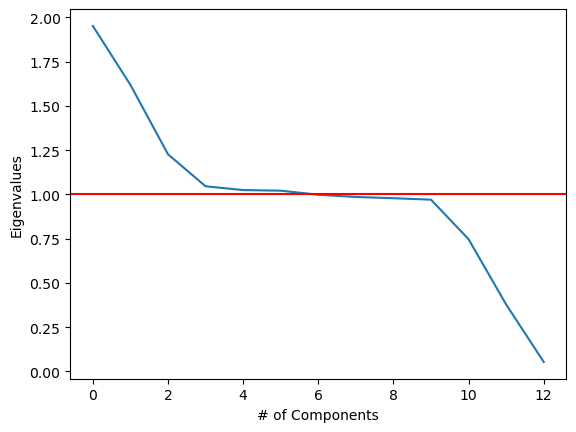

In [117]:
# Create covariance matrix
covar_matrix = np.dot(df_pca_normalized.T, df_pca_normalized)/df_pca.shape[0]
# Generate eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for eigenvector in pca.components_]
# Generate scree plot of eigenvalues, with a line at y = 1 to help figure out which PCs to keep.
plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y = 1, color = 'red')
plt.show()

In [112]:
# Eigenvalues show that the PCA reveals 6 PCs since these are equal to or greater than 1.
eigenvalues

[1.9516719951673451,
 1.6190246693302492,
 1.2267029978788382,
 1.0459013494853657,
 1.0243596272090714,
 1.0209898980590162,
 0.997932786459484,
 0.985500426071572,
 0.978306829835625,
 0.9701537492377342,
 0.7466664452820027,
 0.37792981094232597,
 0.05355941504142026]